In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data_yaml = """\
path: /content/MergedYOLO
train: images/train
val: images/val

names:
  0: fire
  1: smoke
  2: non fire
"""

with open('/content/MergedYOLO/data.yaml', 'w') as f:
    f.write(data_yaml)

print("data.yaml created.")


data.yaml created.


Split Dataset into Train, Validation, and Test Sets

In [ ]:
import os, shutil
from sklearn.model_selection import train_test_split
from pathlib import Path

image_dir = Path("/content/MergedYOLO/images")
label_dir = Path("/content/MergedYOLO/labels")

images = sorted(list(image_dir.glob("*.jpg")))
labels = [label_dir / f"{img.stem}.txt" for img in images]

train_imgs, temp_imgs, train_lbls, temp_lbls = train_test_split(images, labels, test_size=0.36, random_state=42)
val_imgs, test_imgs, val_lbls, test_lbls = train_test_split(temp_imgs, temp_lbls, test_size=5/9, random_state=42)

def move_to_subfolder(images, labels, subset):
    os.makedirs(image_dir / subset, exist_ok=True)
    os.makedirs(label_dir / subset, exist_ok=True)
    for img, lbl in zip(images, labels):
        shutil.move(str(img), str(image_dir / subset / img.name))
        shutil.move(str(lbl), str(label_dir / subset / lbl.name))

move_to_subfolder(train_imgs, train_lbls, "train")
move_to_subfolder(val_imgs, val_lbls, "val")
move_to_subfolder(test_imgs, test_lbls, "test")


Train YOLO Model with Custom Dataset

In [ ]:
model.train(
    data='/content/MergedYOLO/data.yaml',
    imgsz=640,
    epochs=30,
    batch=32,
    device=0,
    workers=2,
    name='fire_smoke_nonfire_split'
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 344MB/s]


Ultralytics 8.3.119 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/MergedYOLO/data.yaml, epochs=30, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=2, project=None, name=fire_smoke_nonfire_yolo, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

100%|██████████| 755k/755k [00:00<00:00, 42.8MB/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

 22        [15, 18, 21]  1   2117209  ultralytics.nn.modules.head.Detect           [3, [128, 256, 512]]          
Model summary: 129 layers, 11,136,761 parameters, 11,136,745 gradients, 28.7 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 172MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1361.6±876.1 MB/s, size: 55.7 KB)


train: Scanning /content/MergedYOLO/labels... 8999 images, 0 backgrounds, 1 corrupt: 100%|██████████| 9000/9000 [00:05<00:00, 1798.61it/s]

train: /content/MergedYOLO/images/WEB07199.jpg: corrupt JPEG restored and saved
train: /content/MergedYOLO/images/WEB07271.jpg: corrupt JPEG restored and saved
train: /content/MergedYOLO/images/WEB07278.jpg: corrupt JPEG restored and saved
train: /content/MergedYOLO/images/WEB07297.jpg: corrupt JPEG restored and saved
train: /content/MergedYOLO/images/WEB07305.jpg: corrupt JPEG restored and saved
train: /content/MergedYOLO/images/WEB07536.jpg: corrupt JPEG restored and saved
train: /content/MergedYOLO/images/WEB07540.jpg: corrupt JPEG restored and saved
train: /content/MergedYOLO/images/WEB07541.jpg: corrupt JPEG restored and saved
train: /content/MergedYOLO/images/WEB07543.jpg: corrupt JPEG restored and saved
train: /content/MergedYOLO/images/WEB07554.jpg: corrupt JPEG restored and saved
train: /content/MergedYOLO/images/WEB07555.jpg: corrupt JPEG restored and saved
train: /content/MergedYOLO/images/WEB07556.jpg: corrupt JPEG restored and saved
train: /content/MergedYOLO/images/WEB075

train: New cache created: /content/MergedYOLO/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 958.6±402.9 MB/s, size: 86.8 KB)


val: Scanning /content/MergedYOLO/labels.cache... 8999 images, 0 backgrounds, 1 corrupt: 100%|██████████| 9000/9000 [00:00<?, ?it/s]

train: /content/MergedYOLO/images/WEB07199.jpg: corrupt JPEG restored and saved
train: /content/MergedYOLO/images/WEB07271.jpg: corrupt JPEG restored and saved
train: /content/MergedYOLO/images/WEB07278.jpg: corrupt JPEG restored and saved
train: /content/MergedYOLO/images/WEB07297.jpg: corrupt JPEG restored and saved
train: /content/MergedYOLO/images/WEB07305.jpg: corrupt JPEG restored and saved
train: /content/MergedYOLO/images/WEB07536.jpg: corrupt JPEG restored and saved
train: /content/MergedYOLO/images/WEB07540.jpg: corrupt JPEG restored and saved
train: /content/MergedYOLO/images/WEB07541.jpg: corrupt JPEG restored and saved
train: /content/MergedYOLO/images/WEB07543.jpg: corrupt JPEG restored and saved
train: /content/MergedYOLO/images/WEB07554.jpg: corrupt JPEG restored and saved
train: /content/MergedYOLO/images/WEB07555.jpg: corrupt JPEG restored and saved
train: /content/MergedYOLO/images/WEB07556.jpg: corrupt JPEG restored and saved
train: /content/MergedYOLO/images/WEB075

Plotting labels to runs/detect/fire_smoke_nonfire_yolo/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/fire_smoke_nonfire_yolo
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      7.01G      1.061      1.517      1.317         26        640: 100%|██████████| 282/282 [03:29<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 141/141 [01:39<00:00,  1.41it/s]


                   all       8999      16665      0.448       0.49      0.461      0.274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      7.05G       1.07      1.242      1.321         29        640: 100%|██████████| 282/282 [03:32<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 141/141 [01:41<00:00,  1.39it/s]


                   all       8999      16665       0.68      0.634      0.663       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30       7.1G      1.042      1.187      1.303         29        640: 100%|██████████| 282/282 [03:25<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 141/141 [01:37<00:00,  1.45it/s]


                   all       8999      16665      0.517      0.614      0.578       0.35

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      6.89G      1.025      1.151      1.284         19        640: 100%|██████████| 282/282 [03:18<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 141/141 [01:32<00:00,  1.53it/s]


                   all       8999      16665      0.545      0.605      0.617      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      7.17G     0.9865      1.083      1.267         19        640: 100%|██████████| 282/282 [03:28<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 141/141 [01:43<00:00,  1.36it/s]


                   all       8999      16665      0.519       0.55      0.554      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      6.88G     0.9745      1.059      1.254         25        640: 100%|██████████| 282/282 [03:31<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 141/141 [01:45<00:00,  1.33it/s]


                   all       8999      16665      0.739      0.694      0.737      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      6.92G     0.9513      1.019      1.237         31        640: 100%|██████████| 282/282 [03:25<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 141/141 [01:36<00:00,  1.46it/s]


                   all       8999      16665      0.721      0.681      0.717      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      7.21G     0.9367     0.9777      1.223         26        640: 100%|██████████| 282/282 [03:25<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 141/141 [01:41<00:00,  1.39it/s]


                   all       8999      16665      0.742      0.704      0.742      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      7.18G     0.9218     0.9322      1.214         35        640: 100%|██████████| 282/282 [03:26<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 141/141 [01:37<00:00,  1.45it/s]


                   all       8999      16665       0.73      0.723      0.765      0.562

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      7.23G     0.9121     0.9218       1.21         24        640: 100%|██████████| 282/282 [03:25<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 141/141 [01:38<00:00,  1.44it/s]


                   all       8999      16665       0.75      0.747      0.784       0.57

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      7.21G     0.8905     0.8932      1.199         33        640: 100%|██████████| 282/282 [03:24<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 141/141 [01:41<00:00,  1.39it/s]


                   all       8999      16665      0.764       0.74       0.78      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      7.16G      0.892      0.886      1.193         31        640: 100%|██████████| 282/282 [03:27<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 141/141 [01:38<00:00,  1.44it/s]


                   all       8999      16665      0.781      0.756      0.795      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      6.86G      0.884     0.8651      1.189         31        640: 100%|██████████| 282/282 [03:25<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 141/141 [01:43<00:00,  1.36it/s]


                   all       8999      16665      0.773      0.755      0.802      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      7.14G     0.8674     0.8499      1.183         32        640: 100%|██████████| 282/282 [03:25<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 141/141 [01:39<00:00,  1.41it/s]


                   all       8999      16665      0.803       0.76      0.811      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      7.15G     0.8625     0.8299      1.172         37        640: 100%|██████████| 282/282 [03:22<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 141/141 [01:39<00:00,  1.42it/s]


                   all       8999      16665      0.786      0.761       0.82      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      7.16G     0.8554     0.8167      1.165         36        640: 100%|██████████| 282/282 [03:26<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 141/141 [01:32<00:00,  1.52it/s]


                   all       8999      16665      0.822      0.781       0.83       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      7.13G     0.8477     0.8034      1.161         26        640: 100%|██████████| 282/282 [03:28<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 141/141 [01:32<00:00,  1.52it/s]


                   all       8999      16665      0.825      0.779       0.83      0.619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      6.88G     0.8491     0.7859       1.16         21        640: 100%|██████████| 282/282 [03:19<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 141/141 [01:43<00:00,  1.37it/s]


                   all       8999      16665      0.816      0.783      0.836      0.625

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      7.15G     0.8374     0.7677      1.154         43        640: 100%|██████████| 282/282 [03:19<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 141/141 [01:36<00:00,  1.47it/s]


                   all       8999      16665      0.827      0.798      0.845      0.632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      7.18G     0.8326      0.757      1.147         36        640: 100%|██████████| 282/282 [03:23<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 141/141 [01:35<00:00,  1.47it/s]


                   all       8999      16665      0.836      0.803      0.852      0.638
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30       7.1G     0.9812     0.8024      1.225         14        640: 100%|██████████| 282/282 [03:36<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 141/141 [01:40<00:00,  1.40it/s]


                   all       8999      16665      0.833      0.805      0.853      0.644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      7.11G     0.9572     0.7521      1.208          9        640: 100%|██████████| 282/282 [03:09<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 141/141 [01:30<00:00,  1.57it/s]


                   all       8999      16665      0.852      0.813      0.867      0.655

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30       7.1G     0.9444     0.7347      1.196          9        640: 100%|██████████| 282/282 [03:15<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 141/141 [01:33<00:00,  1.51it/s]


                   all       8999      16665      0.848      0.812      0.865      0.653

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      7.11G     0.9341     0.7157      1.193         10        640: 100%|██████████| 282/282 [03:13<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 141/141 [01:35<00:00,  1.47it/s]


                   all       8999      16665      0.861      0.823      0.875      0.662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      7.19G     0.9242     0.6921      1.181         15        640: 100%|██████████| 282/282 [03:15<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 141/141 [01:40<00:00,  1.40it/s]


                   all       8999      16665      0.861      0.828       0.88      0.671

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30       7.1G     0.9069     0.6725      1.171         15        640: 100%|██████████| 282/282 [03:15<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 141/141 [01:33<00:00,  1.52it/s]


                   all       8999      16665      0.873      0.838      0.889      0.682

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30       7.1G     0.9047     0.6567      1.169         17        640: 100%|██████████| 282/282 [03:12<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 141/141 [01:34<00:00,  1.49it/s]


                   all       8999      16665      0.876      0.842      0.895      0.688

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30       7.1G     0.8832     0.6348      1.155         15        640: 100%|██████████| 282/282 [03:16<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 141/141 [01:36<00:00,  1.46it/s]


                   all       8999      16665       0.88      0.847      0.899      0.695

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      7.14G     0.8691     0.6174      1.144         11        640: 100%|██████████| 282/282 [03:19<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 141/141 [01:43<00:00,  1.37it/s]


                   all       8999      16665      0.884      0.851      0.904      0.701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30       7.1G      0.863        0.6      1.141          7        640: 100%|██████████| 282/282 [03:19<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 141/141 [01:47<00:00,  1.32it/s]


                   all       8999      16665      0.886      0.858      0.908      0.706

30 epochs completed in 2.542 hours.
Optimizer stripped from runs/detect/fire_smoke_nonfire_yolo/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/fire_smoke_nonfire_yolo/weights/best.pt, 22.5MB

Validating runs/detect/fire_smoke_nonfire_yolo/weights/best.pt...
Ultralytics 8.3.119 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 141/141 [01:46<00:00,  1.33it/s]


                   all       8999      16665      0.886      0.858      0.908      0.706
                  fire       5405       6113      0.879       0.85      0.917      0.639
                 smoke       3000       7553      0.782      0.724       0.81      0.483
              non fire       2999       2999      0.997      0.999      0.995      0.995
Speed: 0.2ms preprocess, 3.0ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/fire_smoke_nonfire_yolo


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bdbffe09590>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

Visualize Training Results: Loss, Confusion Matrix, F1 Curve

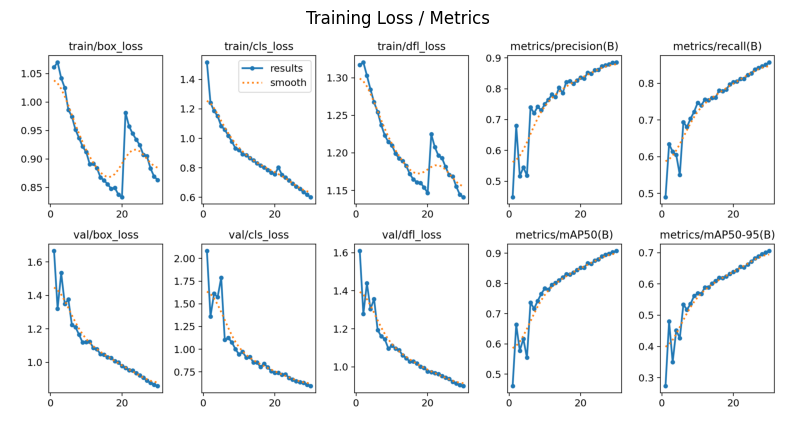

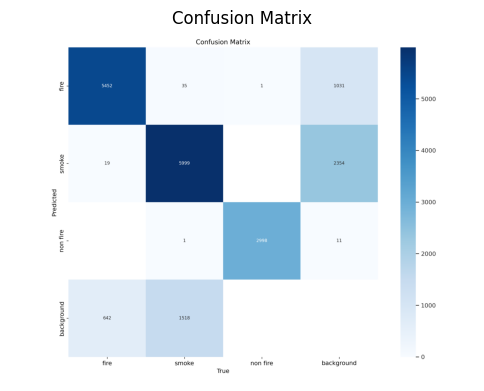

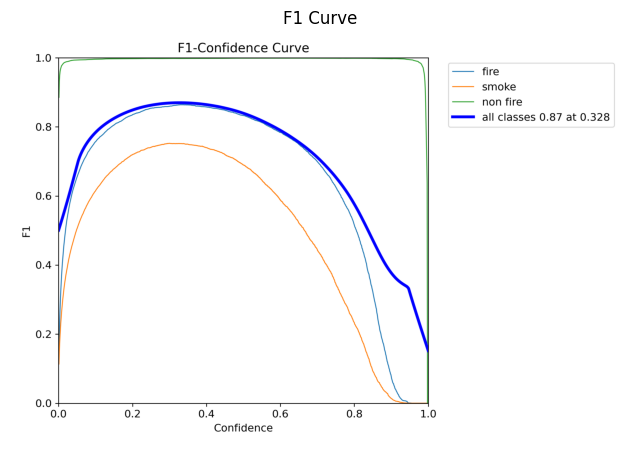

In [ ]:
import matplotlib.pyplot as plt
import cv2
train_dir = '/content/runs/detect/fire_smoke_nonfire_yolo'

results_img = cv2.imread(f'{train_dir}/results.png')
results_img = cv2.cvtColor(results_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,6))
plt.title("Training Loss / Metrics")
plt.imshow(results_img)
plt.axis('off')
plt.show()

conf_matrix_img = cv2.imread(f'{train_dir}/confusion_matrix.png')
conf_matrix_img = cv2.cvtColor(conf_matrix_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6,6))
plt.title("Confusion Matrix")
plt.imshow(conf_matrix_img)
plt.axis('off')
plt.show()
f1_curve_img = cv2.imread(f'{train_dir}/F1_curve.png')
f1_curve_img = cv2.cvtColor(f1_curve_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,6))
plt.title("F1 Curve")
plt.imshow(f1_curve_img)
plt.axis('off')
plt.show()


In [ ]:
from google.colab import files
files.download('/content/runs/detect/fire_smoke_nonfire_yolo/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>